In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Basic functions


`make_tri_mesh(start, size, direction):` return set of points represent coins as points in triangle with inputs
* first vertex of triange
* size of triangle
* direction up(1) and down(-1)

Triangle is represented as `set`. So it's easy to compute intersection of two triangles.

In [2]:
def draw_tri(ax, points, size, color):
    for (x, y) in points:
        ax.add_artist(plt.Circle((x * 0.5, y * np.sqrt(3) * 0.5), size, color=color))
        # ax.add_artist(plt.Circle((x, y), size, color=color))



def draw_3tri(t1, t2, t3):    
    fig = plt.figure(figsize=(10, 10), frameon=False)
    ax = fig.add_subplot(111, aspect='equal')
    
    ax.set_xlim(-10, 10)
    ax.set_ylim(-3, 17)
    
    draw_tri(ax, t1, 0.25, 'r')
    draw_tri(ax, t2, 0.15, 'b')
    draw_tri(ax, t3, 0.05, 'g')
    
    plt.show()


def make_tri_mesh(start, size, direction):
    mesh = set([])
    sx, sy = start
    for i in range(size):
        for j in range(i + 1):
            mesh.add((sx - i + j * 2, sy + i * direction))

    return mesh

# General idea of algorithm
* Create flipped triangle from a starting vertex
* Compute intersection with original triangle (red vertices)
* Iterate over a set of vetices and create a set of flipped triangles and find the maximum overlapping (blue vertices)
* Search range is the triangle with 2x size (green vertices)

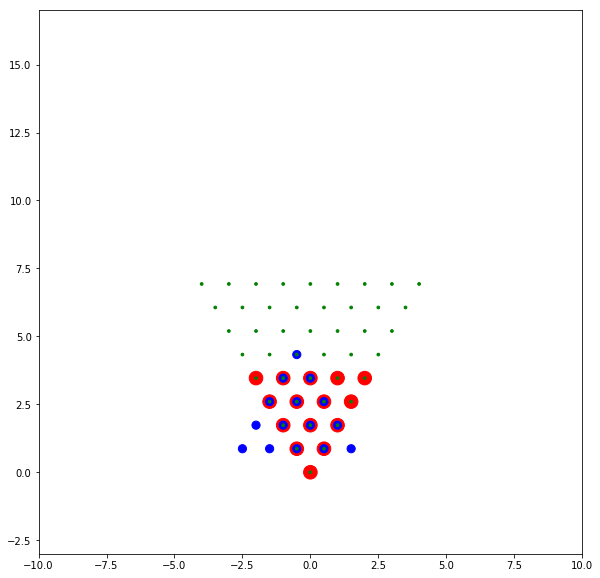

In [3]:
def solve_flip_tri(size):
    tri = make_tri_mesh((0, 0), size, 1)
    tri_flipped = set([])
    tri_search  = make_tri_mesh((0, 0), 2 * size - 1, 1)
    max_intersect = 0

    # Searching all possible positions and find max overlapping
    # Use triangle with 2x size as search space
    for p in tri_search:
        # Create a flipped triangle mesh from starting point in search space
        t = make_tri_mesh(p, size, -1)
        intersect = tri & t
        if len(intersect) > max_intersect:
            tri_flipped = t
            max_intersect = len(intersect)

    # Return mesh of original triangle and flipped triangle
    return tri, tri_flipped, tri_search


t1, t2, t3 = solve_flip_tri(5)
draw_3tri(t1, t2, t3)

# Algorithm 2
Observation is that maximum overlap is alway a flip by a symmetric axis(horizontal). We can narrow search range to vertices on vertical axis. 
* Iterate over vetices of symmetric vertex of the vertex of original triangle
* Find maximum overlapping triangle

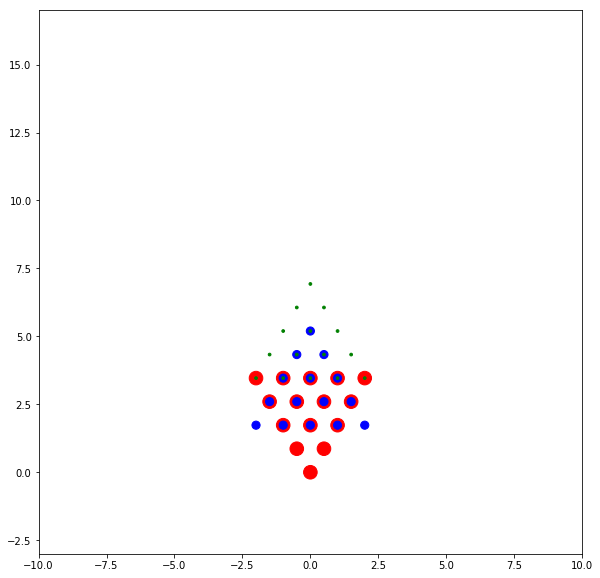

In [4]:
# Faster and only search symmetric positions
def solve_flip_tri2(size):
    tri = make_tri_mesh((0, 0), size, 1)
    tri_flipped = set([])
    tri_search  = make_tri_mesh((0, 2 * (size - 1)), size, -1)
    max_intersect = 0
    
    for i in range(size):
        tri_sym = make_tri_mesh((0, 2 * i), size, -1)

        intersect = tri & tri_sym
        if len(intersect) > max_intersect:
            tri_flipped = tri_sym
            max_intersect = len(intersect)

    # Return mesh of original triangle and flipped triangle
    return tri, tri_flipped, tri_search

t1, t2, t3 = solve_flip_tri2(5)
draw_3tri(t1, t2, t3)

# Generization
Looking at two algorithm, they have very similar code structure. Both are iterating triangles with set of vertices and find maximum overlapping triangle as solution.But they are using different set of vertices. A reasonable abstraction is to build general structure taking set of points as input and iterate over points.

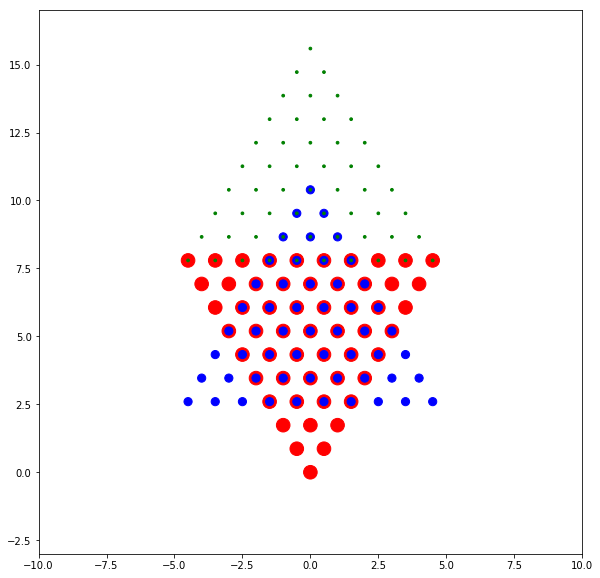

In [5]:
def solve(size, points):
    tri = make_tri_mesh((0, 0), size, 1)
    tri_flipped = set([])
    max_intersect = 0
    
    for p in points:
        t = make_tri_mesh(p, size, -1)
        intersect = tri & t
        if len(intersect) > max_intersect:
            tri_flipped = t
            max_intersect = len(intersect)

    return tri, tri_flipped


size = 10
tri_search  = make_tri_mesh((0, 2 * (size - 1)), size, -1)
t1, t2 = solve(size, tri_search)
draw_3tri(t1, t2, tri_search)

# Is this general enough?
The fundamental idea of the algorithm is to find *maximum intersection* in a set of triangles. So we can use `max(<set>, key)` and simplify code with only one line of code
```
	max(<set of triangles as search range>, key=<size of intersection>)
```
Like this
```
	tri_flipped = max([make_tri_mesh((0, 2 * p), size, -1) for p in range(size)], key=lambda t: len(tri & t))
```
We an use different way to generate search space and use `max()` to find solution. Below is complete code

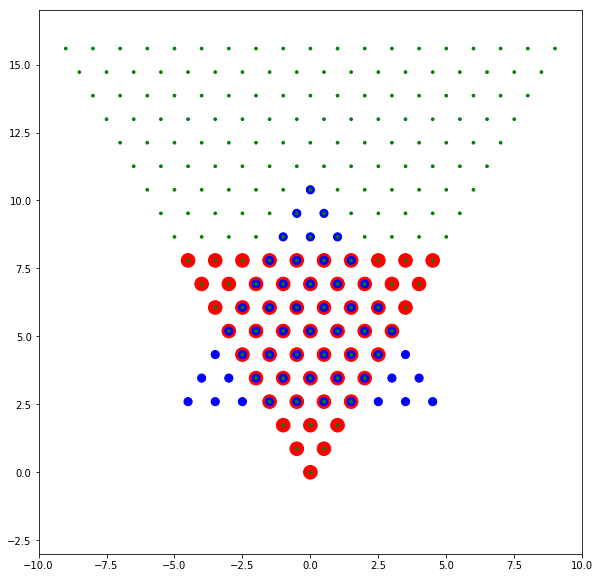

In [6]:
size = 10
method = 1

tri = make_tri_mesh((0, 0), size, 1)

if method == 0:
    tri_flipped = max([make_tri_mesh((0, 2 * p), size, -1) for p in range(size)], key=lambda t: len(tri & t))
    tri_search  = make_tri_mesh((0, 2 * (size - 1)), size, -1)
else:
    tri_flipped = max([make_tri_mesh(p, size, -1) for p in tri_search], key=lambda t: len(tri & t))
    tri_search  = make_tri_mesh((0, 0), 2 * size - 1, 1)
    
draw_3tri(tri, tri_flipped, tri_search)